# Mini Projeto – WALMART

## 1.OBJETIVO DO NEGÓCIO 

Nossa equipe, contratada pela empresa Walmart, realizará uma consultoria estratégica que, por meio de uma análise crítica e aprofundada no setor comercial das diversas lojas da empresa, recomendará a melhor loja para expandir seu tamanho.

Analisaremos os dados disponibilizados, colhendo as informações relevantes e, ao final, auferindo os insights, recomendaremos uma loja que apresentará o melhor potencial financeiro para sua expansão.

Para o melhor entendimento e esclarecimento das indicações serão expostos com precisão as métricas utilizadas para o desenvolvimento dos modelos de análise e da referida recomendação, ressaltando as passagens mais complexas e insights obtidos durante a resolução do projeto.


## 2.BUSINESS UNDERSTANDING
 
- Apresentação
 
A Walmart Inc. é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e abriu seu capital na New York Stock Exchange (NYSE) em 1972.
Para se ter ideia, no ano de 2021, a companhia obteve um lucro de $13.51 Bilhões de dólares, sendo uma das principais lojas de varejo do mundo.
A Walmart realiza vários eventos promocionais de descontos ao longo do ano e essas remarcações precedem feriados importantes. Os quatro maiores de todos incluem o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal, sendo que, as semanas referentes a esses feriados têm um peso maior.
Os dados disponibilizados para a análise contemplam as vendas semanais de 45 lojas espalhadas nos Estados Unidos.

##3.DADOS

Os dados utilizados foram extraídos da seguinte fonte:
 
https://www.kaggle.com/datasets/yasserh/walmart-dataset
 
Numa primeira análise é possível verificar que os dados apresentam as vendas semanais das 45 lojas da rede Wallmart, além de outras métricas econômicas e meteorológicas no período entre 05/02/2010 e 01/11/2012.

## 4.DICIONÁRIO DOS DADOS
As features disponíveis no dataset apresentam um total de 8 atributos e 6435 registros.:
 

·       Store – Número/Identificador único da loja

·       Date – Semana de venda

·       Weekly_Sales – Vendas semanais referentes a loja específica

·       Holiday_Flag – 1 Quando é uma semana com feriado

·       Holiday_Flag – 0 Quando não é uma semana com feriado

·       Temperature – Temperatura no dia da venda em Fahrenheit [°F]        (Posteriormente transformada para Graus Celsius [°C])

·       Fuel_Price – Preço do combustível na região em dólar [$]

·       CPI – (Costumer Price Index) Índice de preço ao consumidor

·       Unemployment – Taxa de Desemprego

·       Holiday Events(Eventos de Feriados):

Super Bowl: 12/02/2010, 11/02/2011, 10/02/2012, 08/02/2012

Labour Day: 10/09/2010, 09/09/2011, 07/09/2012, 06/09/2013

Thanksgiving: 26/11/2010, 25/11/2011, 23/11/2012, 29/11/2013

Christmas: 31/12/2010, 30/12/2011, 28/12/2012, 27/12/2013 

Além dos registros listados acima, foram criados os demais atributos para análise: 

·      Month – Mês da venda

·      Year – Ano da venda

·      unemployment_media – Média da taxa de desemprego por loja

·      Fuel_Price_media – Média do valor do combustível 

·      weekly_sales_media  – Média do valor vendido por semana por loja

## 5. COLETA DE DADOS

In [ ]:
# Instalando as bibliotecas

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Baixando e carregando o Dataset

url = "https://raw.githubusercontent.com/Caricchio-Data/DataExpertClassDNC/main/Walmart.csv"
table = pd.read_csv(url)
df = pd.DataFrame(table)

In [ ]:
# Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Verificando as dimensões do dataset
df.shape

(6435, 10)

## 6.LIMPEZA DOS DADOS

In [ ]:
# Verificando dados faltantes

df.isnull().sum()

In [ ]:
# Verificando valores duplicados

df.duplicated().sum()

0

In [ ]:
# Alterando a coluna Temperature para °C (Celsius)

df['Temperature'] = df.Temperature.apply(lambda x : (x - 32) * (5 / 9))
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,18.266667,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,18.272222,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,12.483333,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,13.594444,3.969,192.330854,8.667


In [ ]:
# Ajustando o formato de data

df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,3,2010
5,1,2010-03-12,1439541.59,0,14.327778,2.667,211.380643,8.106,3,2010
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106,3,2010
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106,3,2010
8,1,2010-04-02,1594968.28,0,16.816667,2.719,210.820450,7.808,4,2010
9,1,2010-04-09,1545418.53,0,18.811111,2.770,210.622857,7.808,4,2010


In [ ]:
# Validação de valores de elementos em tabela
df.nunique().sort_values()

Holiday_Flag       2
Year               3
Month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
# Estastítica descritiva das variáveis numéricas 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Ajustando a exibição das colunas para análise da Estatística descritiva
colunas_numericas = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df[colunas_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Weekly_Sales,6435.00,1046964.88,564366.62,209986.25,553350.10,960746.04,1420158.66,3818686.45
Temperature,6435.00,15.92,10.25,-18.92,8.59,17.04,23.86,37.86
Fuel_Price,6435.00,3.36,0.46,2.47,2.93,3.44,3.73,4.47
CPI,6435.00,171.58,39.36,126.06,131.74,182.62,212.74,227.23
Unemployment,6435.00,8.00,1.88,3.88,6.89,7.87,8.62,14.31


## 7.EXPLORAÇÃO DOS DADOS

In [ ]:
# Lojas com as maiores médias de vendas no período analisado
 
stores_sales_mean = ((df.groupby(['Store']).mean()).sort_values(by=['Weekly_Sales'], ascending=False)['Weekly_Sales'])
stores_sales_mean

# Resultado da análise: As lojas 20 , 4, 14, 13, 2  apresentaram o maior faturamento médio no período

Store
20   2107676.87
4    2094712.96
14   2020978.40
13   2003620.31
2    1925751.34
10   1899424.57
27   1775216.20
6    1564728.19
1    1555264.40
39   1450668.13
19   1444999.04
31   1395901.44
23   1389864.46
24   1356755.39
11   1356383.12
28   1323522.24
41   1268125.42
32   1166568.15
18   1084718.42
22   1028501.04
12   1009001.61
26   1002911.84
34    966781.56
40    964128.04
35    919724.98
8     908749.52
17    893581.39
45    785981.41
21    756069.08
25    706721.53
43    633324.72
15    623312.47
7     570617.31
42    556403.86
9     543980.55
29    539451.43
16    519247.73
37    518900.28
30    438579.62
3     402704.44
38    385731.65
36    373511.99
5     318011.81
44    302748.87
33    259861.69
Name: Weekly_Sales, dtype: float64

In [ ]:
# Dados das lojas com o maior faturamento médio 

sales_bigger = [ 20 , 4, 14, 13, 2]
stores_bigger_sales = df.query('Store in @sales_bigger')
stores_bigger_sales 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
143,2,2010-02-05,2136989.46,0,4.55,2.57,210.75,8.32,2,2010
144,2,2010-02-12,2137809.50,1,3.61,2.55,210.90,8.32,2,2010
145,2,2010-02-19,2124451.54,0,4.27,2.51,210.95,8.32,2,2010
146,2,2010-02-26,1865097.27,0,7.83,2.56,210.98,8.32,2,2010
147,2,2010-03-05,1991013.13,0,8.43,2.62,211.01,8.32,3,2010
...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,14.81,4.00,215.74,7.28,9,2012
2856,20,2012-10-05,2246411.89,0,15.98,3.98,215.93,7.29,10,2012
2857,20,2012-10-12,2162951.36,0,8.44,4.00,216.12,7.29,10,2012
2858,20,2012-10-19,1999363.49,0,13.48,3.97,216.15,7.29,10,2012


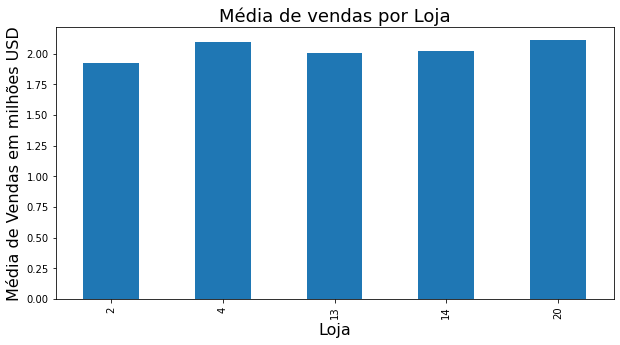

In [ ]:
# Gráfico da média de venda por loja em milhões (5 Lojas com maior faturamento médio)

weekly_sales = stores_bigger_sales['Weekly_Sales'].groupby(df['Store']).mean() / 1000000
plt.figure(figsize=(10,5))
weekly_sales.plot.bar();
plt.title('Média de vendas por Loja', fontsize=18);
plt.ylabel('Média de Vendas em milhões USD', fontsize=16);
plt.xlabel('Loja', fontsize=16);

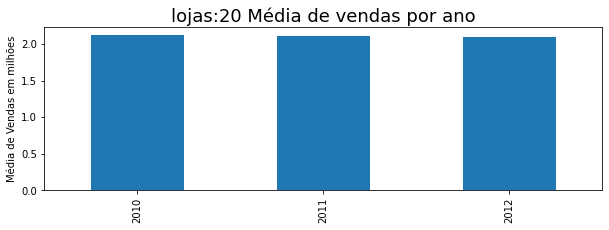

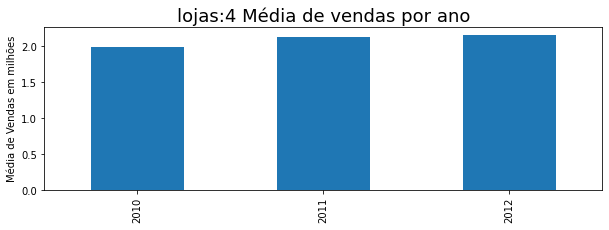

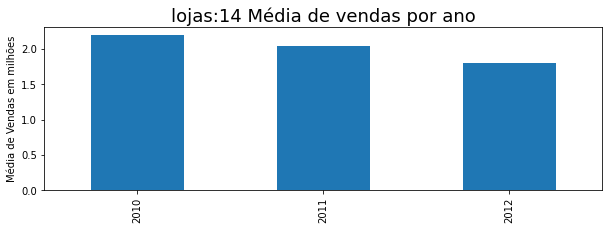

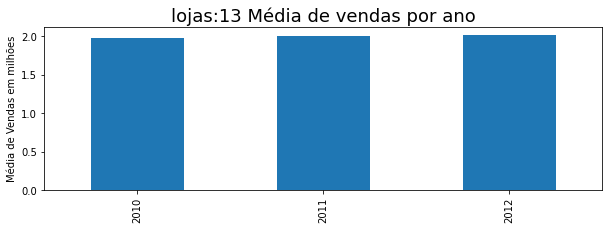

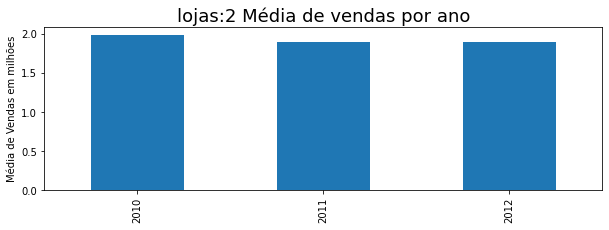

In [ ]:
# Gráfico da média de venda/mês de todos os anos (5 Lojas com maior faturamento médio)
for x in sales_bigger:
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Weekly_Sales'].groupby(df['Year']).mean() / 1000000
  plt.figure(figsize=(10,3))
  weekly_sales.plot.bar();
  plt.title('lojas:%i Média de vendas por ano'%x, fontsize=18);
  plt.ylabel('Média de Vendas em milhões', fontsize=10);
  plt.xlabel('')

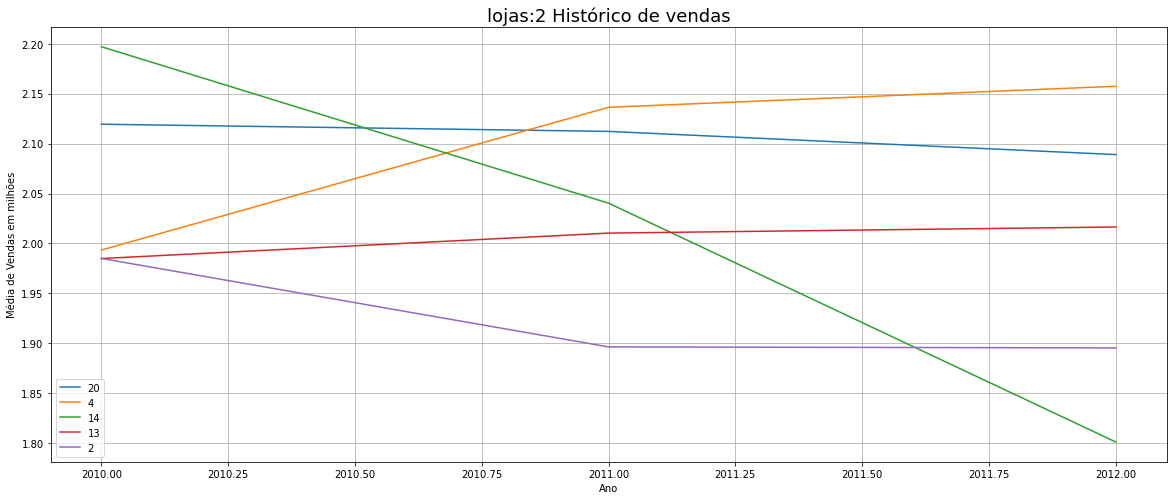

In [ ]:
# Comparativo de vendas x anos entre as lojas (Lojas 20 , 4, 14, 13, 2 )
for x  in sales_bigger:

  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Weekly_Sales'].groupby(df['Year']).mean() / 1000000
  weekly_sales.plot(figsize=(20,8));
  plt.title('lojas:%i Histórico de vendas'%x, fontsize=18);
  plt.ylabel('Média de Vendas em milhões', fontsize=10);
  plt.xlabel('Ano')
  plt.grid(True)
  plt.legend(sales_bigger)

plt.show()

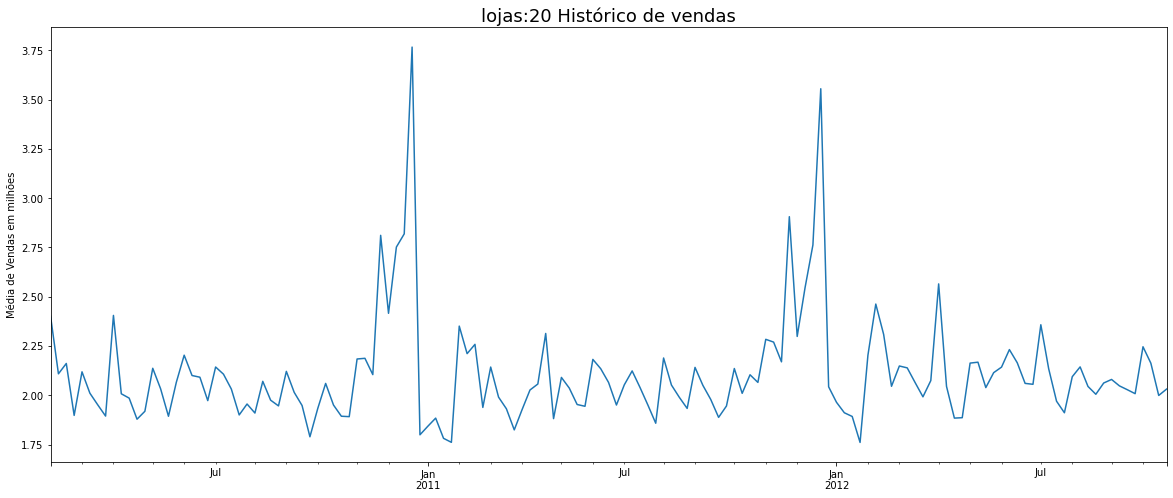

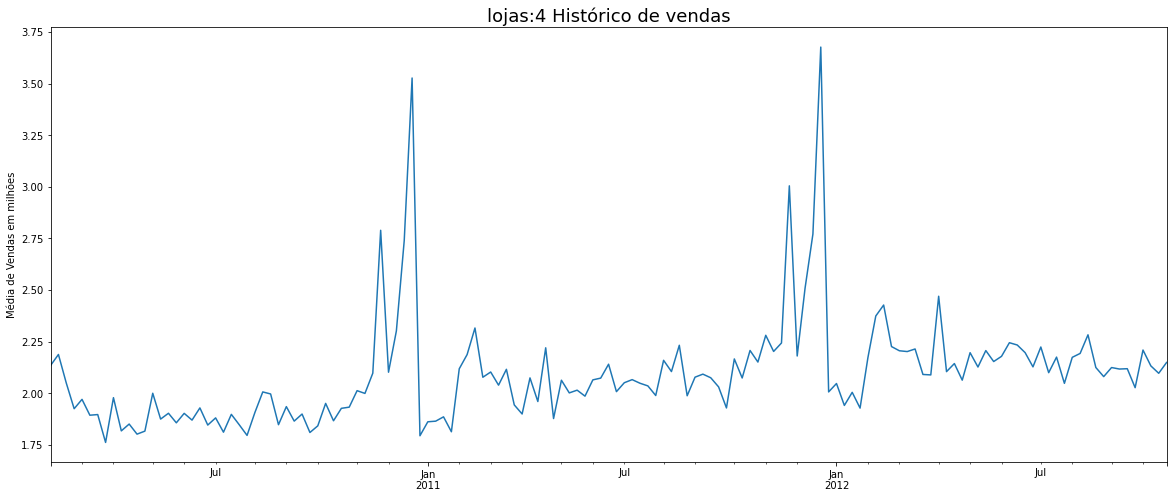

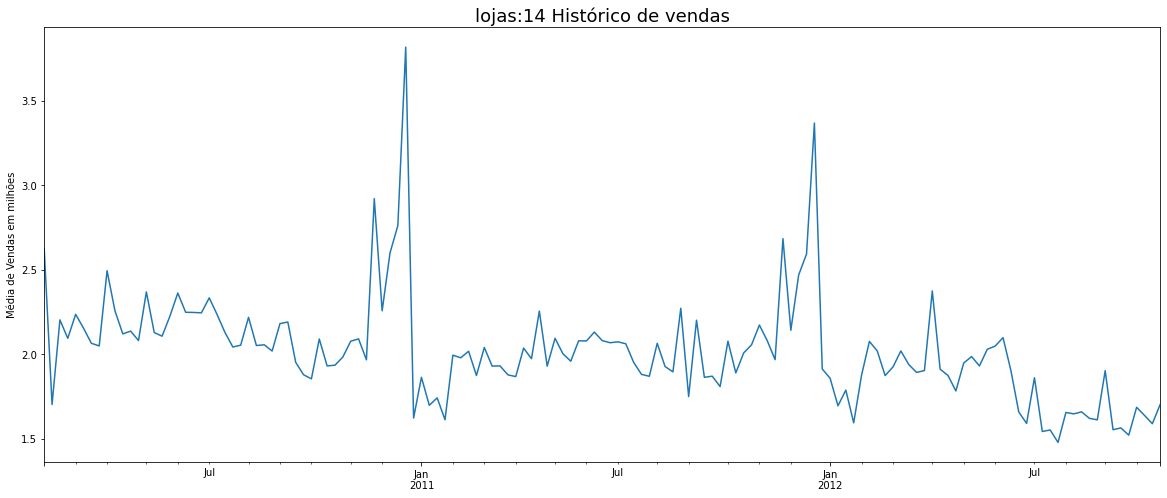

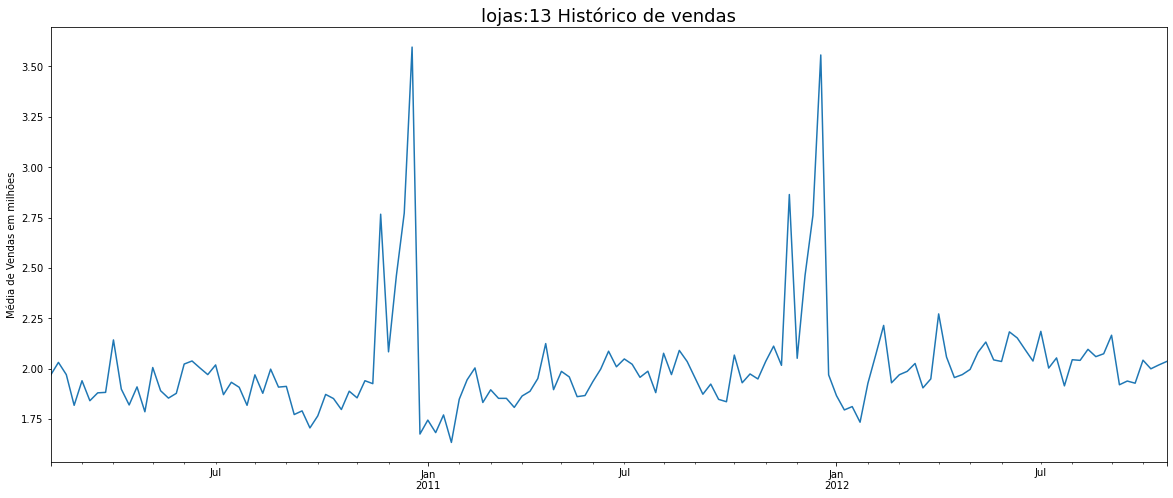

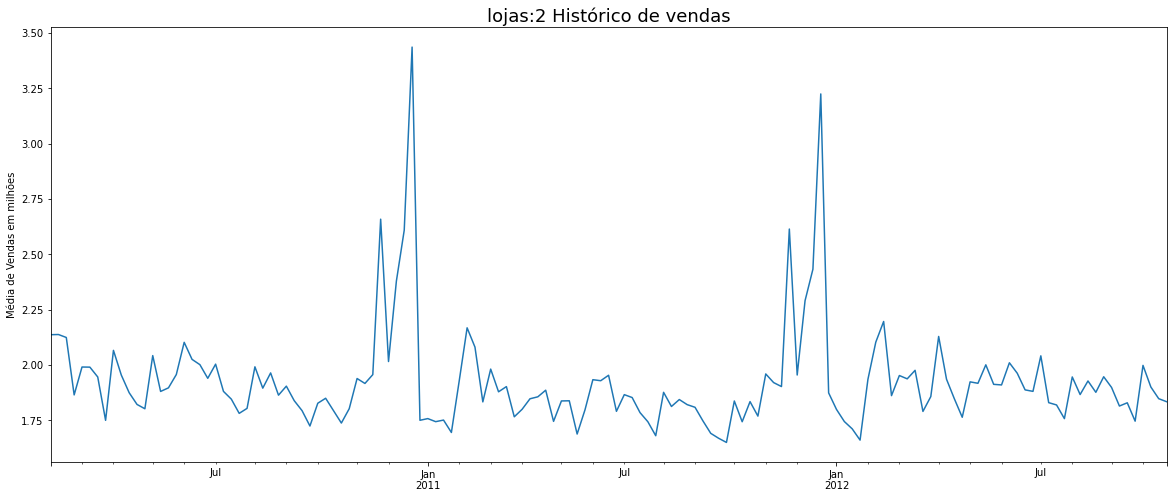

In [ ]:
# Histório de vendas de todo o período
for x  in sales_bigger:
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Weekly_Sales'].groupby(df['Date']).mean() / 1000000
  plt.figure(figsize=(20,8))
  weekly_sales.plot();
  plt.title('lojas:%i Histórico de vendas'%x, fontsize=18);
  plt.ylabel('Média de Vendas em milhões', fontsize=10);
  plt.xlabel('')

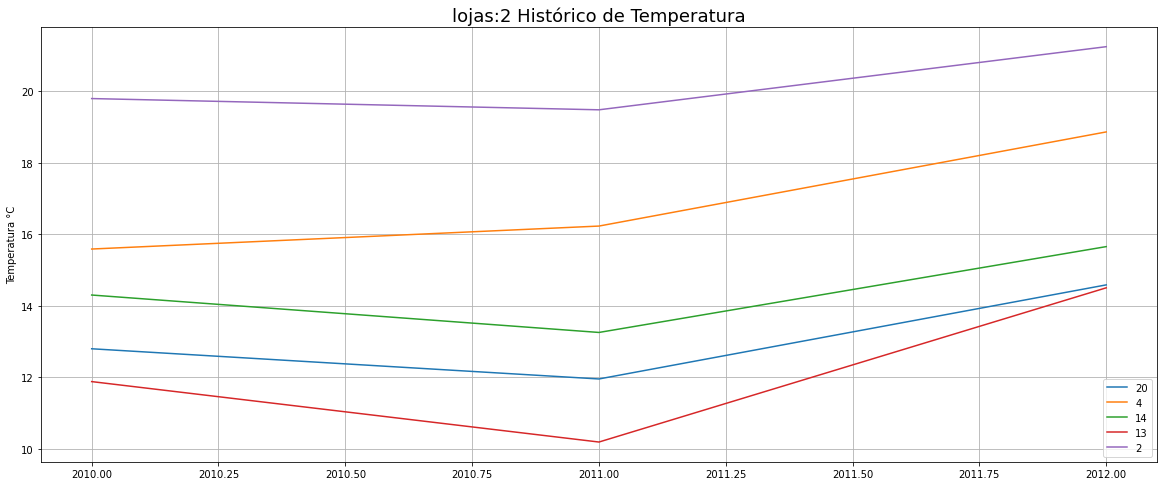

In [ ]:
# Análise do histórico de temperaturas (Lojas 20 , 4, 14, 13, 2 )

for x  in sales_bigger:
  
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Temperature'].groupby(df['Year']).mean()
  weekly_sales.plot(figsize=(20,8));
  plt.title('lojas:%i Histórico de Temperatura'%x, fontsize=18);
  plt.ylabel('Temperatura °C', fontsize=10);
  plt.xlabel('')
  plt.grid(True)
  plt.legend(sales_bigger)

plt.show()

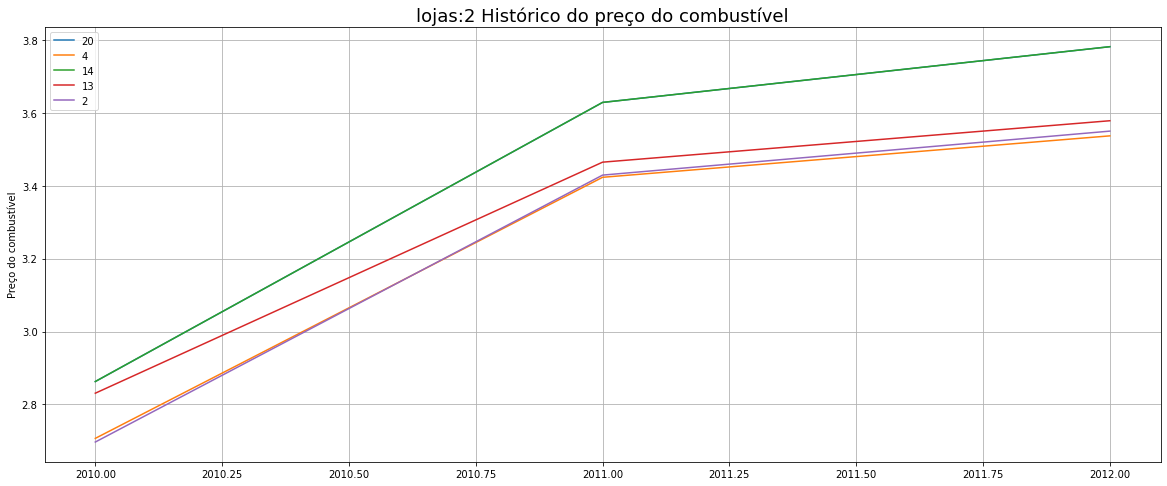

In [ ]:
# Análise do histórico do preço do combustível (Lojas 20 , 4, 14, 13, 2 )

for x  in sales_bigger:
  
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Fuel_Price'].groupby(df['Year']).mean()
  weekly_sales.plot(figsize=(20,8));
  plt.title('lojas:%i Histórico do preço do combustível'%x, fontsize=18);
  plt.ylabel('Preço do combustível', fontsize=10);
  plt.xlabel('')
  plt.grid(True)
  plt.legend(sales_bigger)

plt.show()

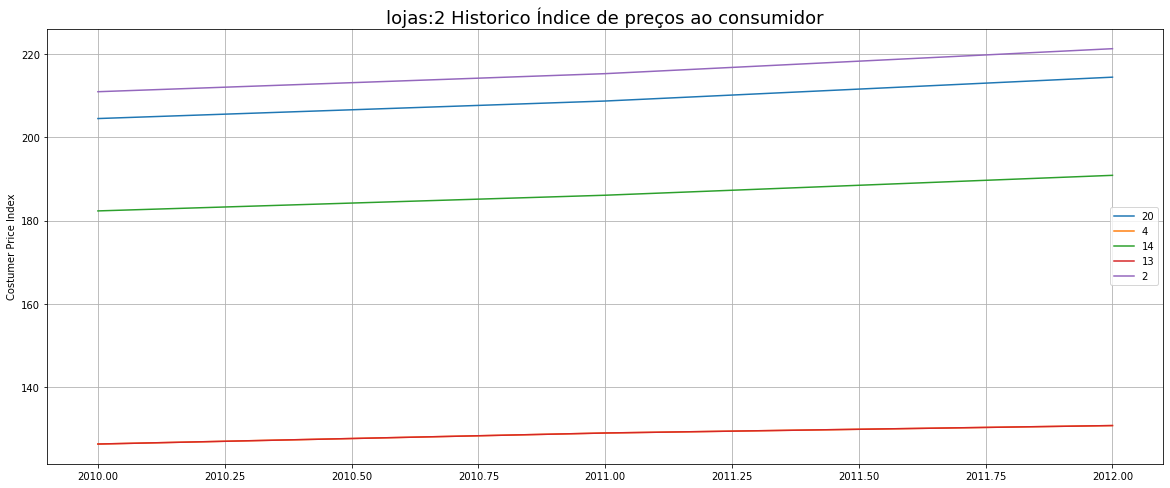

In [ ]:
# Análise do histórico do índice de preços ao consumidor(CPI) (Lojas 20 , 4, 14, 13, 2 )

for x  in sales_bigger:
  
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['CPI'].groupby(df['Year']).mean()
  weekly_sales.plot(figsize=(20,8));
  plt.title('lojas:%i Historico Índice de preços ao consumidor'%x, fontsize=18);
  plt.ylabel('Costumer Price Index', fontsize=10);
  plt.xlabel('')
  plt.grid(True)
  plt.legend(sales_bigger)

plt.show()

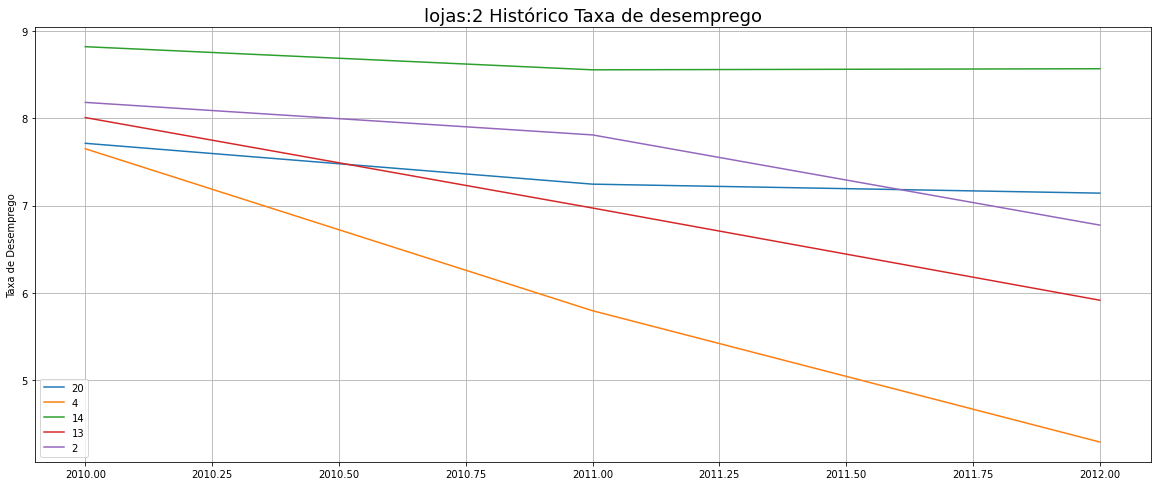

In [ ]:
# Análise do histórico da Taxa de Desemprego (Lojas 20 , 4, 14, 13, 2 )

for x  in sales_bigger:
  
  stores_bigger_sales = df.query('Store == @x')
  weekly_sales = stores_bigger_sales['Unemployment'].groupby(df['Year']).mean()
  weekly_sales.plot(figsize=(20,8));
  plt.title('lojas:%i Histórico Taxa de desemprego'%x, fontsize=18);
  plt.ylabel('Taxa de Desemprego', fontsize=10);
  plt.xlabel('')
  plt.grid(True)
  plt.legend(sales_bigger)

plt.show()

## 8.CONCLUSÃO

Isto posto, diante dos fatores analisados, levando em consideração as métricas estabelecidas, a **Loja 4** e a **Loja 20** se apresentam entre os maiores faturamentos médios gerais. Entretanto é possível perceber, no período analisado, que a enquanto a **Loja 20** apresenta uma leve queda no faturamento médio, a **Loja 4** apresenta crescimento recorrente ao passar dos anos.


A **Loja 13**, ainda que tenha apresentado crescimento moderado no faturamento médio do período examinado, não supera os indicadores da **Loja 4**. 


Insta frisar, que a **Loja 4** apresentou ainda uma vertiginosa e constante queda na taxa de desemprego, o que indica o aumento do poder de compra daquela região, além de um baixo índice de Preços ao Consumidor (CPI), comparada a outras Lojas no mesmo período.


A análise da variação do valor do combustível, assim como a variação de temperatura, não apresentou consistente importância em detrimento dos demais fatores verificados, não apresentando qualquer alteração considerável no faturamento e crescimento entre as lojas examinadas.


**Desta forma, em face da profunda análise dos dados supra, indicamos a ```LOJA 4``` para investimento e expansão, por se apresentar com a maior probabilidade de lucratividade e retorno do referido investimento.**


Destaque-se ainda, que de forma geral, as lojas analisadas apresentaram acentuado e recorrente aumento das vendas entre os meses de novembro e dezembro, reconhecidamente período dos feriados de Thanksgiving e Christmas, motivo pelo qual, indicamos que as obras de expansão sejam realizadas no lapso temporal anterior ou posterior ao referido período, com o fim de preservar o alto faturamento desta época do ano.
